In [2]:
import preprocessing
import plogging

H5_FILE = "SynthText.h5"
CLASSES = ["Ubuntu Mono", "Alex Brush", "Raleway", "Roboto", "Russo One", "Open Sans", "Michroma"]

dataset = preprocessing.create_dataset(H5_FILE)
plogging.info(dataset.head())

[14:39:57] Create dataset started [h5_file=SynthText.h5]
[14:46:04] Function 'create_dataset' executed in 367.0244s


In [18]:
import numpy as np
CLASSES = ["Ubuntu Mono", "Alex Brush", "Raleway", "Roboto", "Russo One", "Open Sans", "Michroma"]
X = np.array(dataset["img"].to_list())/255 # normalize
Y = np.array(dataset["font"].apply(lambda s : CLASSES.index(s)))

<class 'numpy.ndarray'>


In [52]:
import tensorflow as tf
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(X, tf.keras.utils.to_categorical(Y), random_state=0, test_size=0.05)


model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(64, 64 ,1)),
    tf.keras.layers.LayerNormalization(axis=1 , center=True , scale=True),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(88, activation='relu'),
    tf.keras.layers.Dense(88*7, activation='relu'),
    tf.keras.layers.Dense(7, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=25, validation_data=(x_test, y_test), batch_size=256, verbose=1)

y_pred = model.predict(x_test)
model.summary()

Epoch 1/25
105/105 [==============================] - 15s 132ms/step - loss: 1.5687 - accuracy: 0.3884 - val_loss: 1.3746 - val_accuracy: 0.4844
Epoch 2/25
105/105 [==============================] - 14s 133ms/step - loss: 1.2206 - accuracy: 0.5313 - val_loss: 1.2650 - val_accuracy: 0.5043
Epoch 3/25
105/105 [==============================] - 13s 129ms/step - loss: 1.0513 - accuracy: 0.6034 - val_loss: 1.1694 - val_accuracy: 0.5532
Epoch 4/25
105/105 [==============================] - 13s 127ms/step - loss: 0.9326 - accuracy: 0.6513 - val_loss: 1.1300 - val_accuracy: 0.5766
Epoch 5/25
105/105 [==============================] - 13s 127ms/step - loss: 0.8200 - accuracy: 0.6910 - val_loss: 1.2036 - val_accuracy: 0.5695
Epoch 6/25
105/105 [==============================] - 13s 128ms/step - loss: 0.7169 - accuracy: 0.7319 - val_loss: 1.1881 - val_accuracy: 0.5887
Epoch 7/25
105/105 [==============================] - 13s 127ms/step - loss: 0.6178 - accuracy: 0.7675 - val_loss: 1.2105 - val_ac

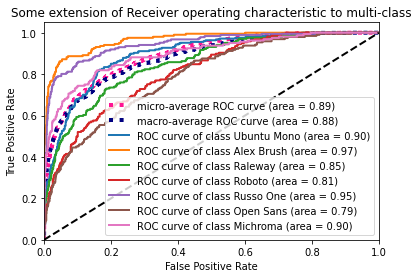

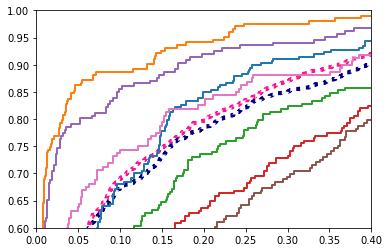

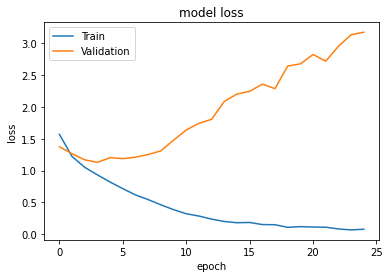

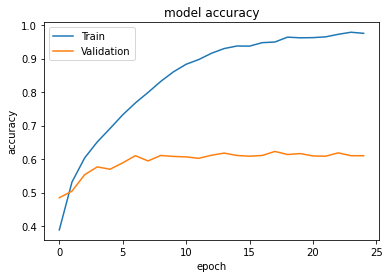

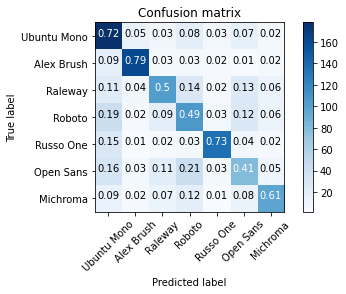

In [53]:
import metrics
import importlib
importlib.reload(metrics)
metrics.plot_roc(y_test, y_pred, CLASSES)
metrics.plot_acc(history)
metrics.plot_loss(history)
metrics.plot_confusion_matrix(y_test, y_pred, CLASSES)